<div style="border:solid blue 2px; padding: 20px">
  
**Hello Byron.**

I'm happy to review your project today. 

You will find my comments in coloured cells marked as 'Reviewer's comment'. The cell colour will vary based on the contents - I am explaining it further below. 

**Note:** Please do not remove or change my comments - they will help me in my future reviews and will make the process smoother for both of us. 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment</b> 
    
Such comment will mark efficient solutions and good ideas that can be used in other projects.
</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment</b> 
    
The parts marked with yellow comments indicate that there is room for optimisation. Though the correction is not necessary it is good if you implement it.
</div>

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment</b> 
    
If you see such a comment, it means that there is a problem that needs to be fixed. Please note that I won't be able to accept your project until the issue is resolved.
</div>

You are also very welcome to leave your comments / describe the corrections you've done / ask me questions, marking them with a different colour. You can use the example below: 

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>

<div style="border:solid green 2px; padding: 20px">
    
<div class="alert alert-success">
<b>Review summary</b> 
    
Byron, thanks for submitting the project. You've done an outstanding job and I enjoyed reviewing it.
    
- You completed all the tasks.
- You did EDA and conducted the statistical test flawlessly.
    
I've got no critical comments, just a few recommendations. 
    
Keep up the good work.

# Sprint 6 Project

Summary: 
This project consists of exploratory data analyses  and hypothesis testing of information from Zuber, a new ride sharing company in Chicago.  The main objective of this project is to understand passenger preferences and the impact of external factor on rides.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Well done that you start with the title and introduction.
</div>


# Importing the Neccessary Libraries

In [1]:
#Import the necessary libraries.
import requests

import pandas as pd

from bs4 import BeautifulSoup

import numpy as np

import seaborn as sns 

from scipy import stats as st

import matplotlib.pyplot as plt

# Uploading the Dataframes

In [2]:
#Save the website address for the project as a string in order to parse the data from the website.
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'

In [3]:
#Use the get() function from the requests library in order to send the requests for data from
#the web server from the website provided in the URL variable.
req = requests.get(URL)

In [4]:
#Use the BeautifulSoup() function in order to prase the data from the req variable into lxml text
#format.
soup = BeautifulSoup(req.text, 'lxml')

In [5]:
#Use find() function in order to find the first occurence of the value "table".  Set the 
#attributes variable to a dictionary titled, "id": "weather records".
table = soup.find('table', attrs={"id": "weather_records"})


In [6]:
#Use the text function in order to rerun a text output from the headers in the parsed data.
#Use the find_all() function to find all the headers sections ('th') in the parsed data (lxml) in 
#order to retrieve them as input for the string.
headers = [header.text for header in table.find_all('th')]

In [7]:
#Create an empty list to hold all the table rows.
rows = []

#Create a for loop that loops through every <tr> (table row) element in the HTML table.
for row in table.find_all('tr'):
    #Extract all <td> (data cell elements from the row.
    cells = row.find_all('td')
    #Only proccess rows that contain data cells.  This if statement should skip header or empty rows.
    if len(cells) > 0:
        #Extract the text from each cell and append the test to the 'rows' list.
        rows.append([cell.text for cell in cells])

In [8]:
#Use the pd.Dataframe() function in order to create a dataframe using the data in the previously created rows 
#list as the input for the rows and use the headers variables as the input for the columns.
weather_records = pd.DataFrame(rows, columns=headers)

#Use the head() method to print the first five rows of the dataframe.
weather_records.head()

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds


In [9]:
#Use the rename() method in order to rename the columns in the weather_records dataframe appropriately.
weather_records = weather_records.rename(columns={'Date and time' : 
                                                  'date_and_time', 
                                                  'Temperature': 'temperature',
                                                  'Description': 'description'})

#Use the head() method in order print the first five rows of the dataframe.
weather_records.head()

,date_and_time,temperature,description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
For this project I'm starting my review here.</div>


In [10]:
#Create a try and except clause that reads/uploads the dataframe in a local and non-local
#computer.
try:
    company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
except:
    company_trips = pd.read_csv('moved_project_sql_result_01 (2).csv')

#Use the head() method in order to print the first five rows of the company_trips dataframe.
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 


    
Please note that you don't need to describe the code so thorougly. It is advisable to describe more your observations / takeaways. </div>


I recently edited this notebook and I fixed this issue.  Please disregard this reviewer's note.

In [11]:
#Create a try and except clause to upload/read the dataframe in a local and non-local computer.
try:
    dropoff_location = pd.read_csv('/datasets/project_sql_result_04.csv')
except:
    dropoff_location = pd.read_csv('moved_project_sql_result_04 (2).csv')

#Use the head() method in order to print the first five rows of the dropoff_location dataframe.
dropoff_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [12]:
#Create a try and except clause in order to read/upload the dataframe in a local and nonlocal
#computer.
try:
    weather_conditions = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    weather_conditions = pd.read_csv('moved_project_sql_result_07 (3).csv')

#Use the head() method to print the first five rows of the dataframe.
weather_conditions.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 

Just clarifying that this is not really a weather conditions dataframe, but the trip duration (plus in what conditions the trip was done).

# Checking Data Types

In [13]:
#Use the info() method on weather_records dataframe in order to check the datatypes in each column.
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_and_time  697 non-null    object
 1   temperature    697 non-null    object
 2   description    697 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB


Code Result:
The temperature and description columns have the correct datatypes, but the date_and_time column needs to be converted from object data type to datetime64[ns] datatype.

In [14]:
#Use the pd.to_datetime() function in order to convert the date_and_time column of the 
#weather_records dataframe from object to datetime64[ns].
weather_records['date_and_time'] = pd.to_datetime(weather_records['date_and_time'], format='%Y-%m-%d %H:%M:%S')

In [15]:
#Use the info() method in order to recheck the datatypes in the columns of the weather_records dataframe.
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_and_time  697 non-null    datetime64[ns]
 1   temperature    697 non-null    object        
 2   description    697 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 16.5+ KB


Code Result:
The date_and_time column of the weather_records dataframe was converted to datetime64[ns] successfully.

In [16]:
#Use the info() method in order to check the data types in the columns of the company_trips dataframe.
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Code Result:
The columns in the company_name dataframe have the appropriate data types.

In [17]:
#Use the info() method in order to check the data types in the columns of the dropoff_location dataframe.
dropoff_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Code Result:
The columns in the dropoff_location dataframe have the appropriate data types.

In [18]:
#Use the info() method on weather_conditions dataframe in order to check the datatypes in each column.
weather_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Code Result:
The temperature and description columns have the correct datatypes, but the start_ts column needs to be converted from object data type to datetime64[ns] datatype.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You are absolutely right - `start_ts` column needs to have the datatime type.</div>


In [19]:
#Use the pd.to_datetime() function in order to convert the start_ts column of the weather_conditions 
#dataframe from object to datetime64[ns].
weather_conditions['start_ts'] = pd.to_datetime(weather_conditions['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [20]:
#Use the info() method in order to recheck the datatypes in the columns of the weather_conditions dataframe.
weather_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Code Result:
The start_ts column of the weather_conditions dataframe was converted to datetime64[ns] successfully.

# Checking For Duplicates

In [21]:
#Use the duplicated() and sum() methods in order to count duplicate values in the weather_records dataframe.
weather_records.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the weather_records dataframe.

In [22]:
#Use the duplicated() and sum() methods in order to count duplicate values in the company_trips dataframe.
company_trips.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the company_trips dataframe.

In [23]:
#Use the duplicated() and sum() methods in order to count duplicate values in the dropoff_location dataframe.
dropoff_location.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the dropoff_location dataframe.

In [24]:
#Use the duplicated() and sum() methods in order to count duplicate values in the weather_conditions dataframe.
weather_conditions.duplicated().sum()

197

Code Result:
There are 197 duplicate values noted in the weather_conditions dataframe.

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 



I'm not sure we are having real duplicates here, as there can be trips that started in the same hour and lasting for the same number of seconds. So we probably should not delete them.

In [25]:
#Use the drop_duplicates method in order to drop the duplicate values from the weather_conditions dataframe.
weather_conditions.drop_duplicates(inplace=True)

#Use the duplicated() and the sum() methods in order to count 
#the number of duplicate values in the weather_conditions column once again.
weather_conditions.duplicated().sum()

0

Code Result:
There are no more duplicate values noted in the weather_conditions dataframe.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Very good that you checked for the duplicates.

</div>


# Checking For Missing Values

In [26]:
#Use the isna() and sum() methods in order to count the number of missing values in each column of the 
#weather_records dataframe.
weather_records.isna().sum()

date_and_time    0
temperature      0
description      0
dtype: int64

Code Result:
There are no missing values noted in the weather_records dataframe.

In [27]:
#Use the isna() and sum() methods in order to count the number of missing values in each column of the company_trips 
#dataframe.
company_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

Code Result:
There are no missing values noted in the company_trips dataframe.

In [28]:
#Use the isna() and sum() methods in order to count the number of missing values in each column of 
#the dropoff_location dataframe.
dropoff_location.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Code Result:
There are no missing values noted in the dropoff_location dataframe.

In [29]:
#Use the isna() and sum() methods in order to count the number of missing values in each column 
#of the weather_conditions dataframe.
weather_conditions.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Code Result:
There are no missing values noted in the weather_conditions dataframe.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You've done an excellent data checks and preparation for the further analysis.</div>


# Exploratory Data Analysis

### Bar Chart For Number of Rides Per Taxi Company (Task from Step 4)

In [30]:
#Use the groupby() and sum() methods in order to sum up the stacked values in the trips_amount
#column of the company_name dataframe.
c_sum = company_trips.groupby('company_name')['trips_amount'].sum()

#Use the reset_index() method in on the c_sum dataframe in order to reset the index. Use the rename()
#method in order to rename the trips_amount column to trips_amount_sum()
c_sum = c_sum.reset_index().rename(columns={'trips_amount': 'trips_amount_sum'})

#Use the sort_values method in order to sort the column by the values in the trips_amount_sum
#column.
c_sum = c_sum.sort_values(by='trips_amount_sum', ascending=False)

#Use the head() method in order to print the first five rows of trips_amount_sum.
c_sum.head()

,company_name,trips_amount_sum
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
50,Medallion Leasing,10367
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299


In [31]:
#Create an index that contain the appropriate company names that will be used for the bar chart that contains
#the top 10 neighborhoods in terms of drop-offs.
company = ['Flash Cab', 
           'Taxi Affiliation Services', 
           'Medallion Leasin',
           'Yellow Cab',
           'Taxi Affiliation Service Yellow',
           'Chicago Carriage Cab Corp',
           'City Service', 
           'Sun Taxi',
           'Star North Management LLC',
           'Blue Ribbon Taxi Association Inc.']

#Use the isin() method on the company_name column of the c_sum dataframe in order to check for any values
#from the company variable in the column of the dataframe.
c_trip = c_sum['company_name'].isin(company)

#Use conditional filtering in order to create the c_trips dataframe.
c_trips = c_sum[c_trip]

#Use the head() method to print the first 5 rows of the c_trips dataframe.
c_trips.head()

,company_name,trips_amount_sum
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299
36,Chicago Carriage Cab Corp,9181


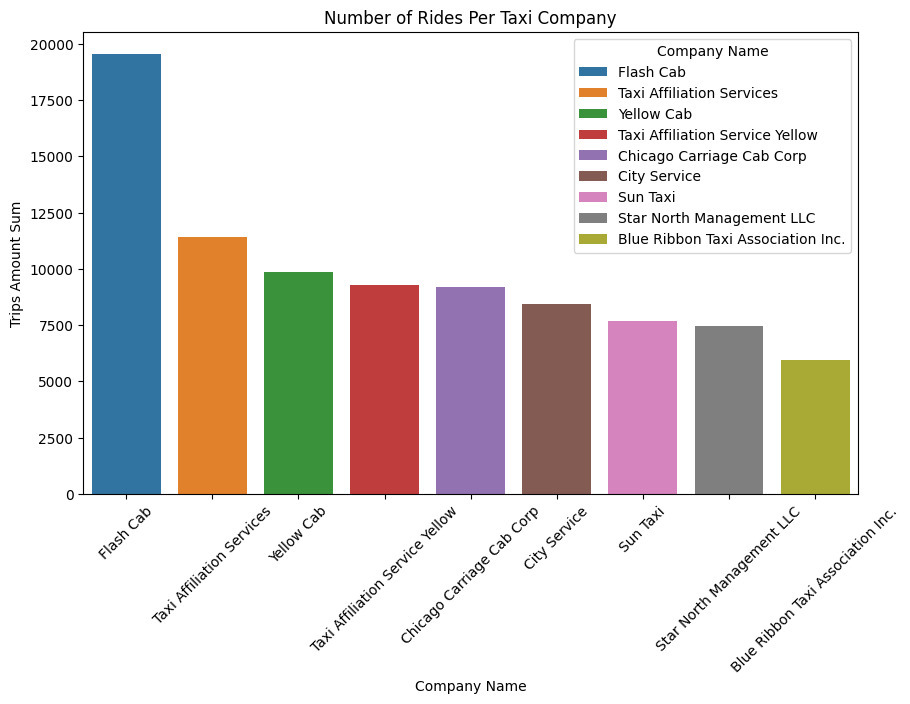

In [32]:
#Use matplotlib and seaborn in order to create a bar chart for the number of
#rides per taxi company.
plt.figure(figsize=(10,6))
sns.barplot(
    data=c_trips,
    x="company_name",
    y="trips_amount_sum",
    hue="company_name",
    dodge=False
) 

plt.title("Number of Rides Per Taxi Company")
plt.xlabel("Company Name")
plt.ylabel("Trips Amount Sum")
plt.legend(title="Company Name")
plt.xticks(rotation=45)
plt.show()

Conclusion/ Answer:
I chose 10 companies for this analysis which are:
1) Flash Cab- with an average trips amount sum of 19,558.
2) Taxi Affiliation Services- with an average trips amount sum of 11,422.
3) Medallion Leasin- with an average trips amount sum of 10,367.
4) Yellow Cab- with an average trips amount sum of 9,888.
5) Tax Affiliation Service Yellow- with an average trips amount sum of 9,299.
6) Chicago Carriage Cab Corp- with an average trips amount sum of 9,181.
7) City Service- with an average trips amount sum of 8,448.
8) Sun Taxi- with an average trips amount sum of 7,701.
9) Star North Management LLC- with an average trips amount sum of 7,455.
10) Blue Ribbon Taxi Association Inc.- with an average trips amount sum of 5,953.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You draw a very nice bar chart with all the necessary elements - a title, axis names. However, the legend is redundant here, because each bar is titled.
    
 </div>


### Identify the top 10 neighborhoods in terms of drop-offs (Task from Step 4)

In [33]:
#Group the dataframe by dropoff_location_name.  Use the sum() method in order to 
#sum the values in 'average_trips' for each dropoff location.
top_n_sum = dropoff_location.groupby('dropoff_location_name')['average_trips'].sum()

#Use the reset_index() and rename() methods to rename the index and rename the columns.
top_n_sum = top_n_sum.reset_index().rename(columns={'average_trips': 'average_trips_sum'})

#Use the sort_values() method to sort the values by the average_trips_sum column in descending order.
top_n_sum = top_n_sum.sort_values(by='average_trips_sum', ascending=False)
top_n_sum.head(10)

,dropoff_location_name,average_trips_sum
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667


In [34]:
#Create a list of the dropoff location names that will be used in the bar chart.
location = ['Loop', 
            'River North', 
            'Streeterville', 
            'West Loop',
            "O'Hare", 
            'Lake View', 
            'Grant Park', 
            'Museum Campus', 
            'Gold Coast', 
            'Sheffield & DePaul']

#Use the isin() method in order top check with dropoff locations are in the location list and 
#return a boolean series of the results.
top_10 = top_n_sum['dropoff_location_name'].isin(location)

#Use conditional filtering in order to filter out the columns in the top_n_sum
#column that are present in the top_10 variable.
top_10_df = top_n_sum[top_10]

#Use the head() method in order to print the first five rows of the dataframe.
top_10_df.head(10)

,dropoff_location_name,average_trips_sum
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667


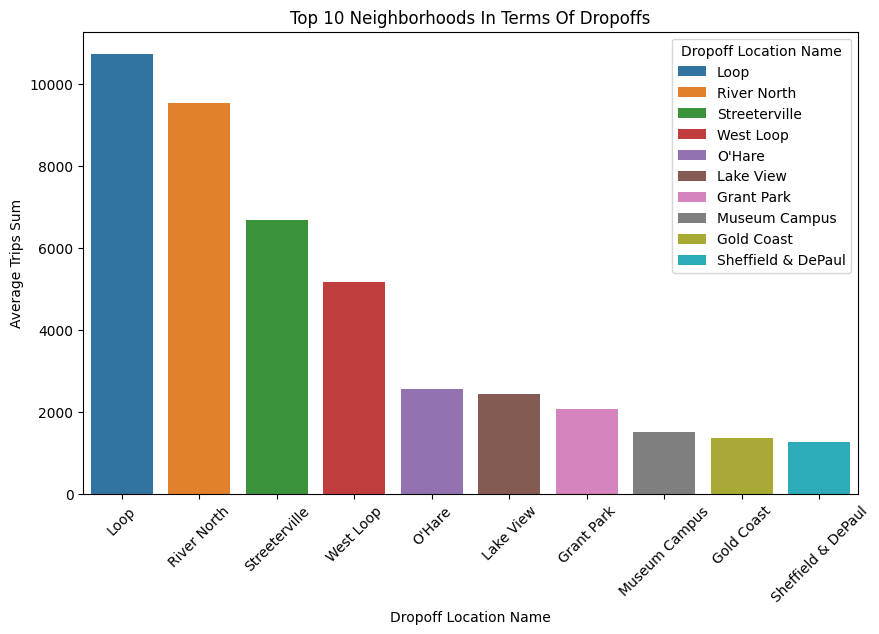

In [35]:
#Use matplotlib and seaborn in order to create a bar chart of the 'Top 10 Neighborhoods In
#Terms of Dropoffs".
plt.figure(figsize=(10,6))

sns.barplot(
    data=top_10_df,
    x="dropoff_location_name",
    y="average_trips_sum",
    hue="dropoff_location_name",
    dodge=False)

plt.title("Top 10 Neighborhoods In Terms Of Dropoffs")
plt.xlabel("Dropoff Location Name")
plt.ylabel("Average Trips Sum")
plt.legend(title="Dropoff Location Name")
plt.xticks(rotation=45)
plt.show()

Conclusion/ Answer:
The top 10 neighborhoods in terms of dropoffs are listed:  
1) Loop- with an average trips sum of 10,727.47.
2) River North- with an average trips sum of 9,523.
3) Streeterville- with an average trips sum of 6,664.667.
4) West Loop- with an average trips sum of 5,163.667.
5) O'Hare- with an average trips sum of 2,549.9.
6) Lake View- with an average trips sum of 2,420.
7) Grant Park- with an average trips sum of 2,068.533. 
8) Museum Campus- with an average trips sum of 1,510.
9) Gold Coast- with an average trips sum of 1,364.233.
10) Sheffield & DePaul- with an average trips sum of 1,259.767.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
OK, good.</div>


# Hypothesis Question (Task from Step 5)
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
Filter bad.
1 population is good and 1 population is bad and you test the hypothesis.
calculated the variance, calculate standard deviation. 

Null Hypothesis:
The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

Alternate Hypothesis:
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Rationale For Alternative and Null Hypotheses:
* I chose to make the proposed hypothesis in the project the alternative hypothesis because it indicates that the two samples are not equal(duration of rides changes on rainy Saturdays).  I formulated the null hypothesis by stating the opposite of the proposed hypothesis, which would state the two samples are equal(duration of rides does not change on  rainy Saturdays).

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
The hypotheses are correct.</div>


In [36]:
#Using conditional filtering, create a dataframe that only lists rows that 
#have 'Good' as an entry for the weather_condiitons column.
good = weather_conditions[weather_conditions['weather_conditions'] == 'Good']

In [37]:
#Using conditional filtering, create a dataframe that only lists rows that have 
#'Bad' as an entry for the weather_condiitons column.
bad = weather_conditions[weather_conditions['weather_conditions'] == 'Bad']

In [38]:
#Use np.var() in order to calculate the variabnce in the duration_seconds column of the bad dataframe.
bad_var = np.var(bad['duration_seconds'])

print(f"Variance of duration_seconds column of the 'bad' dataframe: {bad_var:.2f}")

Variance of duration_seconds column of the 'bad' dataframe: 561003.10


In [39]:
#Use np.var() in order to calculate the variance in the duration_seconds column of the good dataframe.
good_var = np.var(good['duration_seconds'])

print(f"Variance of duration_seconds column of the 'good' dataframe: {good_var:.2f}")

Variance of duration_seconds column of the 'good' dataframe: 597389.54


Overall Conclusion:  The variances of the duration_seconds column of the bad dataframe and the good dataframe are not equal.  The variance of the durations_seconds column of the good dataframe is greater than the variance of the duration_seconds column of the bad dataframe.

In [40]:
#Use np.std() in order to calculate the standard deviation of the duration_seconds column of the bad
#dataframe.
bad_std = np.std(bad['duration_seconds']) 

print(f"Standard deviation of the duration_seconds column of the 'bad' dataframe: {bad_std:.2f}")

Standard deviation of the duration_seconds column of the 'bad' dataframe: 749.00


In [41]:
#Use np.std() in order to calculate the standard deviation of the duration_seconds column of the 
#good dataframe.
good_std = np.std(good['duration_seconds'])
print(f"Standard deviation of the duration_seconds column of the 'good' dataframe: {good_std:.2f}")

Standard deviation of the duration_seconds column of the 'good' dataframe: 772.91


Overall Conclusion:
The standard deviation of the duration_seconds column of the good dataframe is greater than the standard deviation of the duration_seconds column of the bad dataframe.  The two standard deviations are not equal.

Rationale for ttest:
* I chose to use the ttest_ind() function to test the hypothesis because it measures the means of two independent samples of scores (duration of seconds when weather is good and duration of seconds when weather is bad.)

In [42]:
#Create a variable called alpha with the value 0.05.  This variable will represent the 5 percent probability 
#that will be used for the ttest.
alpha = 0.05

#Use the ttest_ind() function from the scipy library with the duration_seconds column of 
#the bad dataframe as the first arguement and the duration_seconds column of the good dataframe as the second arguement.  
#Set the equal_var parameter to False because the two variances are not equal.
results = st.ttest_ind(bad['duration_seconds'], good['duration_seconds'], equal_var=False)

#Create an if-else statement that prints the string "We reject null hypothesis" if results.pvalue is less 
#than alpha or prints the string "We cannot reject null hypothesis" if the else statement is valid.
print('pvalue:', results.pvalue)
if results.pvalue < alpha:
    print("We reject null hypothesis")
else:
    print("We cannot reject null hypothesis.")

pvalue: 9.126383933880083e-08
We reject null hypothesis


Conclusion/ Answer:
According to the ttest, the hypothesis that states: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.", is correct because the null hypothesis has been rejected.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You've created the samples correctly and used a suitable statistical test. Indeed, the test shows that the null hypothesis can be rejected.  </div>


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 

We do not say that an alternative hypothesis is correct. We usually say that it can be accepted if we rejected the null hypothesis.

# Final Overall Conclusion:
1) From the list of taxi companies that I chose to display in the first bar chart of the exploratory data analysis portion of the project, the company with the most amount of trips per company was Flash Cab, which had 19,558 trips.  The company with the least amount of trips per company was Blue Ribbon Taxi Association Inc., with 5,953 trips.

2) The top 10 neighborhoods in terms of dropoffs are:
   1) Loop
   2) River North
   3) Streeterville
   4) West Loop
   5) O'Hare
   6) Lake View
   7) Grant Park
   8) Museum Campus
   9) Gold Coast
   10) Sheffield & DePaul

3) The proposed hypothesis stating, "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.", was proven correct according to the ttest.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Excellent that you did not forget to write the conclusion.</div>
